In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [4]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 6.9 MB/s 
     |████████████████████████████████| 63 kB 694 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import yfinance as yf

In [6]:
stock_name = input('Enter the Stock Ticker: ')
print(f'You entered {stock_name}')

start_date = input('Enter start date in yyyy-mm-dd format')
print(f'You entered {start_date}')

end_date = input('Enter start date in yyyy-mm-dd format')
print(f'You entered {end_date}')

Enter the Stock Ticker: TSLA
You entered TSLA
Enter start date in yyyy-mm-dd format2010-01-28
You entered 2010-01-28
Enter start date in yyyy-mm-dd format2021-12-16
You entered 2021-12-16


In [7]:
df_yahoo = yf.download( stock_name,
start= start_date,
end=end_date,
progress=False)

In [8]:
df_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [9]:
df = df_yahoo
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-13',
               '2021-12-14', '2021-12-15'],
              dtype='datetime64[ns]', name='Date', length=2888, freq=None)

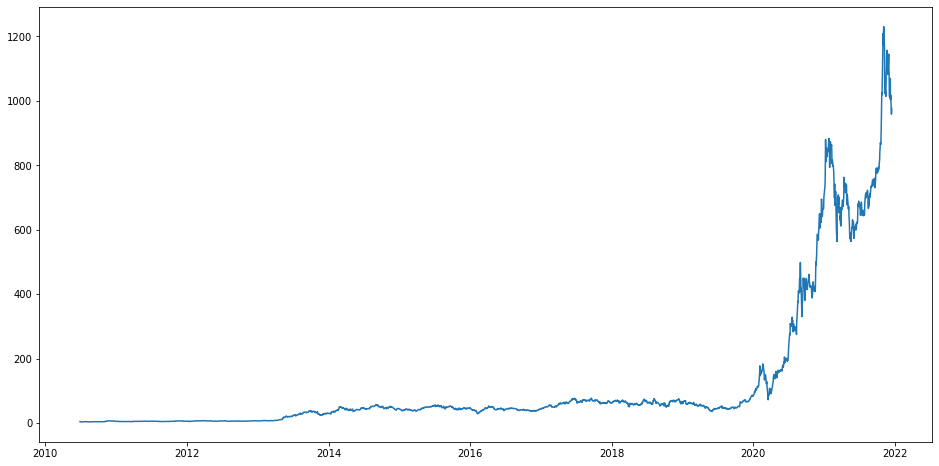

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"], label='Closing Price')

In [12]:
data = df.sort_index(ascending=True, axis=0)
df2 = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])
for i in range(0,len(data)):
    df2['Date'][i]=data.index[i]
    df2["Close"][i]=data["Close"][i]

In [13]:
df2

,Date,Close
0,2010-06-29 00:00:00,4.778
1,2010-06-30 00:00:00,4.766
2,2010-07-01 00:00:00,4.392
3,2010-07-02 00:00:00,3.84
4,2010-07-06 00:00:00,3.222
...,...,...
2883,2021-12-09 00:00:00,1003.8
2884,2021-12-10 00:00:00,1017.03
2885,2021-12-13 00:00:00,966.41
2886,2021-12-14 00:00:00,958.51


In [14]:
df2

,Date,Close
0,2010-06-29 00:00:00,4.778
1,2010-06-30 00:00:00,4.766
2,2010-07-01 00:00:00,4.392
3,2010-07-02 00:00:00,3.84
4,2010-07-06 00:00:00,3.222
...,...,...
2883,2021-12-09 00:00:00,1003.8
2884,2021-12-10 00:00:00,1017.03
2885,2021-12-13 00:00:00,966.41
2886,2021-12-14 00:00:00,958.51


In [15]:
df2["Date"]=pd.to_datetime(df2.Date,format="%Y-%m-%d")

In [16]:
df2

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.84
4,2010-07-06,3.222
...,...,...
2883,2021-12-09,1003.8
2884,2021-12-10,1017.03
2885,2021-12-13,966.41
2886,2021-12-14,958.51


In [17]:
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
length_df2 = len(df2)
train_length = int(length_df2*(70/100))

test_start = train_length+1
test_start

2022

In [19]:
final_dataset = df2.values

train_data=final_dataset[0:train_length,:]
valid_data=final_dataset[test_start:,:]

df2.index = df2.Date
df2.drop("Date",axis=1,inplace=True)

final_dataset = df2.values


In [20]:
df2

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.84
2010-07-06,3.222
...,...
2021-12-09,1003.8
2021-12-10,1017.03
2021-12-13,966.41


In [21]:
final_dataset

array([[4.7779998779296875],
       [4.765999794006348],
       [4.392000198364258],
       ...,
       [966.4099731445312],
       [958.510009765625],
       [975.989990234375]], dtype=object)

In [22]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.78520477],
       [0.77876502],
       [0.79301403]])

In [23]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [24]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

In [25]:
print(x_train_data.shape[0])

1961


In [26]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [27]:
x_train_data.shape[1]

60

In [28]:
#lstm model

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=df2[len(df2)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=50,batch_size=10,verbose=2)



Epoch 1/50
197/197 - 14s - loss: 3.5029e-05 - 14s/epoch - 72ms/step
Epoch 2/50
197/197 - 9s - loss: 6.6219e-06 - 9s/epoch - 47ms/step
Epoch 3/50
197/197 - 9s - loss: 5.5541e-06 - 9s/epoch - 47ms/step
Epoch 4/50
197/197 - 10s - loss: 4.6027e-06 - 10s/epoch - 50ms/step
Epoch 5/50
197/197 - 9s - loss: 4.6082e-06 - 9s/epoch - 48ms/step
Epoch 6/50
197/197 - 9s - loss: 3.6085e-06 - 9s/epoch - 46ms/step
Epoch 7/50
197/197 - 9s - loss: 3.7793e-06 - 9s/epoch - 46ms/step
Epoch 8/50
197/197 - 9s - loss: 3.9087e-06 - 9s/epoch - 47ms/step
Epoch 9/50
197/197 - 9s - loss: 2.8737e-06 - 9s/epoch - 47ms/step
Epoch 10/50
197/197 - 10s - loss: 2.7597e-06 - 10s/epoch - 49ms/step
Epoch 11/50
197/197 - 10s - loss: 3.1388e-06 - 10s/epoch - 51ms/step
Epoch 12/50
197/197 - 11s - loss: 2.7721e-06 - 11s/epoch - 56ms/step
Epoch 13/50
197/197 - 9s - loss: 2.4867e-06 - 9s/epoch - 46ms/step
Epoch 14/50
197/197 - 9s - loss: 3.0325e-06 - 9s/epoch - 47ms/step
Epoch 15/50
197/197 - 9s - loss: 2.2780e-06 - 9s/epoch - 47ms

In [29]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [30]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [31]:
lstm_model.save("saved_model.h5")

In [32]:
predicted_closing_price.shape

(866, 1)

In [33]:
type(valid_data)

numpy.ndarray

In [34]:
(train_data)

array([[Timestamp('2010-06-29 00:00:00'), 4.7779998779296875],
       [Timestamp('2010-06-30 00:00:00'), 4.765999794006348],
       [Timestamp('2010-07-01 00:00:00'), 4.392000198364258],
       ...,
       [Timestamp('2018-07-05 00:00:00'), 61.832000732421875],
       [Timestamp('2018-07-06 00:00:00'), 61.779998779296875],
       [Timestamp('2018-07-09 00:00:00'), 63.70199966430664]],
      dtype=object)

In [35]:
# train_data=df2[:2200]
# valid_data=df2[2201:]
train_data=final_dataset[0:train_length,:]
valid_data=final_dataset[test_start:,:]
predicted_closing_price = np.array(predicted_closing_price)

# new_data = pd.DataFrame({
#     'Close' : X_test,
#     'Pred'  : predicted_closing_price
# })


#valid_data['Predictions']=predicted_closing_price
# plt.plot(train_data["Close"])
# plt.plot(new_data[['Close',"Predictions"]])

In [36]:
df3= df2.copy(deep=True)
df3 = df3[test_start:]
df3.shape

(866, 1)

In [37]:
df3['Pred'] = predicted_closing_price

In [38]:
df3

,Close,Pred
Date,,
2018-07-11,63.792,65.820206
2018-07-12,63.342,65.002861
2018-07-13,63.774,64.403633
2018-07-16,62.02,64.826691
2018-07-17,64.538,63.164860
...,...,...
2021-12-09,1003.8,1003.083252
2021-12-10,1017.03,951.250793
2021-12-13,966.41,951.821045


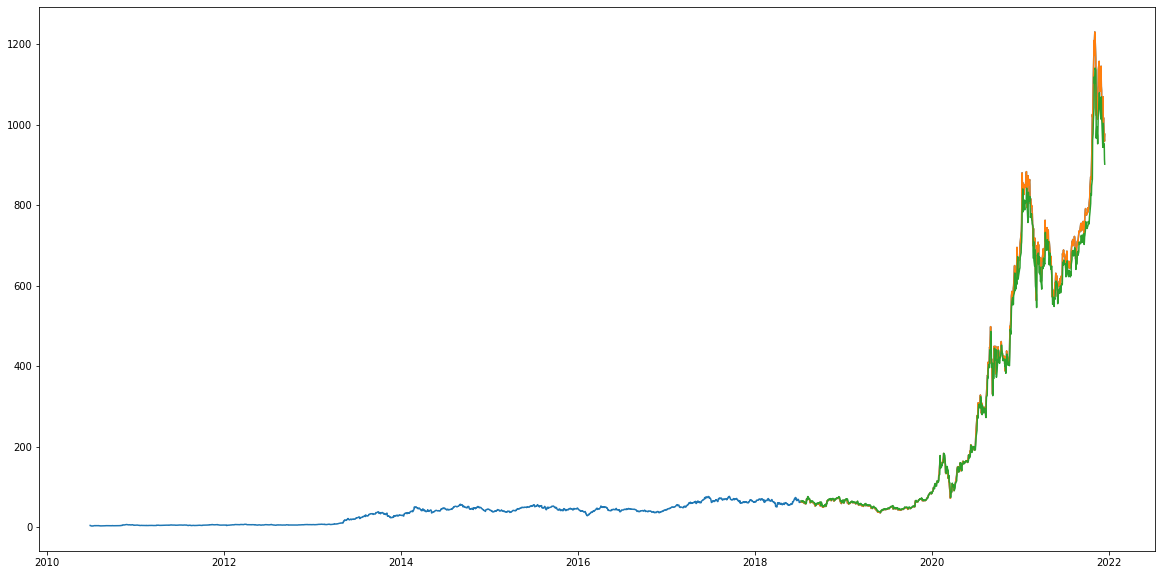

In [39]:
plt.plot(df2['Close'])
plt.plot(df3[['Close',"Pred"]])

In [40]:
#valid_data["Predictions"]

In [41]:
X_test.shape

(866, 60, 1)

In [42]:
predicted_closing_price.shape

(866, 1)

In [43]:
df3

,Close,Pred
Date,,
2018-07-11,63.792,65.820206
2018-07-12,63.342,65.002861
2018-07-13,63.774,64.403633
2018-07-16,62.02,64.826691
2018-07-17,64.538,63.164860
...,...,...
2021-12-09,1003.8,1003.083252
2021-12-10,1017.03,951.250793
2021-12-13,966.41,951.821045


In [44]:
from numpy import sqrt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, mean_squared_error
print (sqrt(mean_squared_error( df3['Close'] , df3['Pred'] )) )


26.67571682257484


In [45]:
import math
from sklearn.metrics import mean_squared_error, r2_score

# trainScore = math.sqrt(mean_squared_error(Y_train , train_predict))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(df3['Close'] , df3['Pred'] ))
print('Root Mean Square Error Score: %.2f RMSE' % (testScore))

r2 = r2_score(df3['Close'] , df3['Pred'])
print ('R2 score: %.2f R2' %(r2))

Root Mean Square Error Score: 26.68 RMSE
R2 score: 0.99 R2


In [46]:
#df2

In [47]:
# X_train =  []
# for i in range(60,x_train_data.shape[0]):
#     X_train.append(x_train_data[i-60:i,0])
# X_train=np.array(X_train)


# predications_train =lstm_model.predict(X_train)
# predications_train

# predications_train=scaler.inverse_transform(predications_train)
# predications_train


In [48]:
#valid_data

In [49]:
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plotdf = pd.DataFrame({'date': df2.index,
                       'original_close': df3['Close'],
                       'train_predicted_close' : df2['Close'],
                      'test_predicted_close': df3['Pred']})

In [50]:
title_variable = " " + stock_name +" Stock Prediction"

fig = px.line(plotdf,x=plotdf['date'], y=plotdf['original_close'], title=title_variable)
fig.add_traces(
    list(px.line(plotdf,x='date', y='test_predicted_close', color_discrete_sequence = ['red'] ).select_traces() )
)

fig.add_traces(
    list(px.line(plotdf,x='date', y='train_predicted_close' , color_discrete_sequence = ['green']).select_traces() )
)


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Close",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()

In [51]:
# Future prediction 

In [52]:
 look_back = 60

In [53]:
df['Close'].shape

(2888,)

In [54]:
close_data = df['Close'].values

close_data = close_data.reshape((-1))

In [55]:
#function

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

In [56]:
num_prediction = 60
forecast = predict(num_prediction, lstm_model)
forecast_dates = predict_dates(num_prediction)


# X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# predicted_closing_price=lstm_model.predict(X_test)
# predicted_closing_price=scaler.inverse_transform(predicted_closing_price)


#forecast_new = scaler.inverse_transform(forecast.reshape(-1,1))

In [57]:
forecast

array([9.75989990e+02, 1.80059731e+00, 1.88259065e+00, 1.92064857e+00,
       1.90101039e+00, 1.87418318e+00, 1.85190654e+00, 1.83514369e+00,
       1.82195759e+00, 1.80664992e+00, 1.78021419e+00, 1.73661208e+00,
       1.67634940e+00, 1.60198474e+00, 1.51408815e+00, 1.41271508e+00,
       1.30017149e+00, 1.18169034e+00, 1.06392014e+00, 9.52853918e-01,
       8.52800608e-01, 7.66214371e-01, 6.93661809e-01, 6.34095132e-01,
       5.85551560e-01, 5.45874357e-01, 5.13142109e-01, 4.85809088e-01,
       4.62693483e-01, 4.42909658e-01, 4.25793946e-01, 4.10843432e-01,
       3.97669822e-01, 3.85966599e-01, 3.75487924e-01, 3.66034299e-01,
       3.57442439e-01, 3.49579096e-01, 3.42335224e-01, 3.35622072e-01,
       3.29367399e-01, 3.23512673e-01, 3.18010122e-01, 3.12820911e-01,
       3.07912916e-01, 3.03259611e-01, 2.98838526e-01, 2.94630826e-01,
       2.90619880e-01, 2.86791414e-01, 2.83132792e-01, 2.79632449e-01,
       2.76280403e-01, 2.73067147e-01, 2.69984215e-01, 2.67023772e-01,
      

In [58]:
fig_new = px.line(plotdf,x=forecast_dates, y=forecast, title=title_variable)
fig_new.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig_new.show()

In [59]:
#ARIMA

In [60]:
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [61]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [62]:
df4= df.copy(deep=True)

In [63]:
#df4.reset_index(inplace=True)
df4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2021-12-09,1060.640015,1062.489990,1002.359985,1003.799988,1003.799988,19812800
2021-12-10,1008.750000,1020.979980,982.530029,1017.030029,1017.030029,19855000
2021-12-13,1001.090027,1005.000000,951.419983,966.409973,966.409973,26198500


In [64]:
import statsmodels.api as sm

In [65]:
type(df2)

pandas.core.frame.DataFrame

In [66]:
# Forcesting libs
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

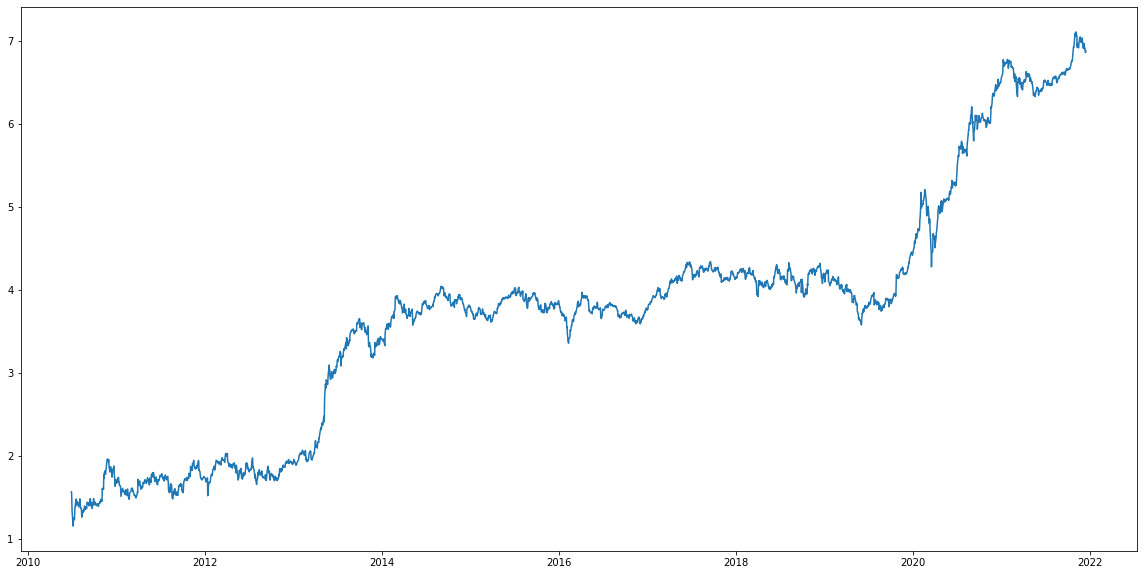

In [67]:
df_log = np.log(df2.astype(np.float64))
plt.plot(df_log)

In [68]:
# function to stabilize data
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

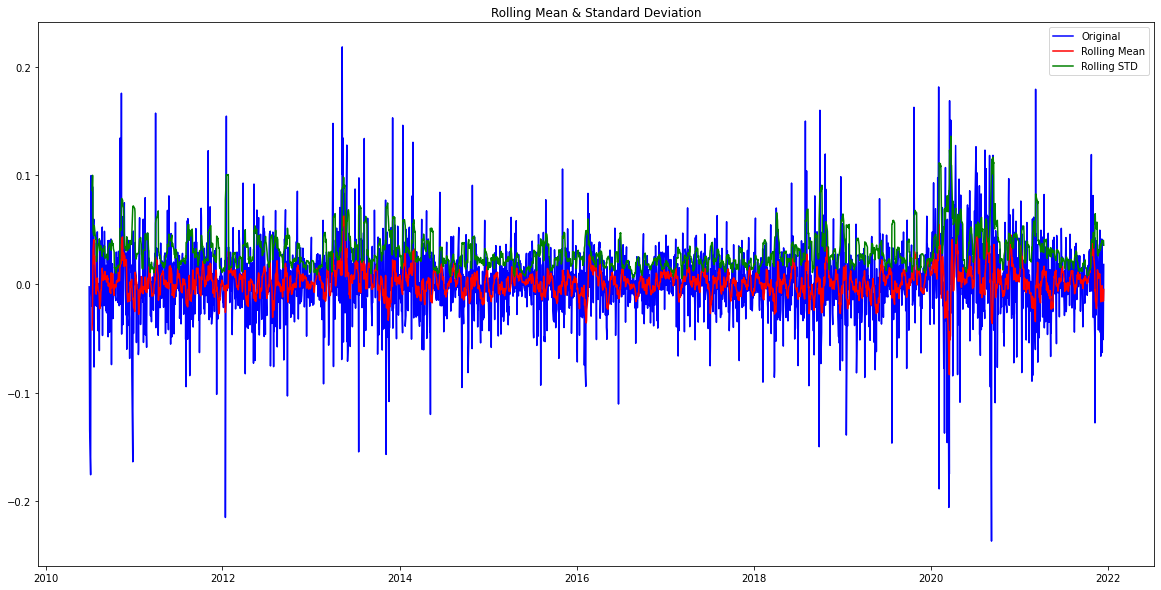

ADF Statistic: -53.54768900827033
p value: 0.0
Critical Values:
	1%: -3.4326178883893763
	5%: -2.862541999961805
	10%: -2.567303393388591


In [69]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

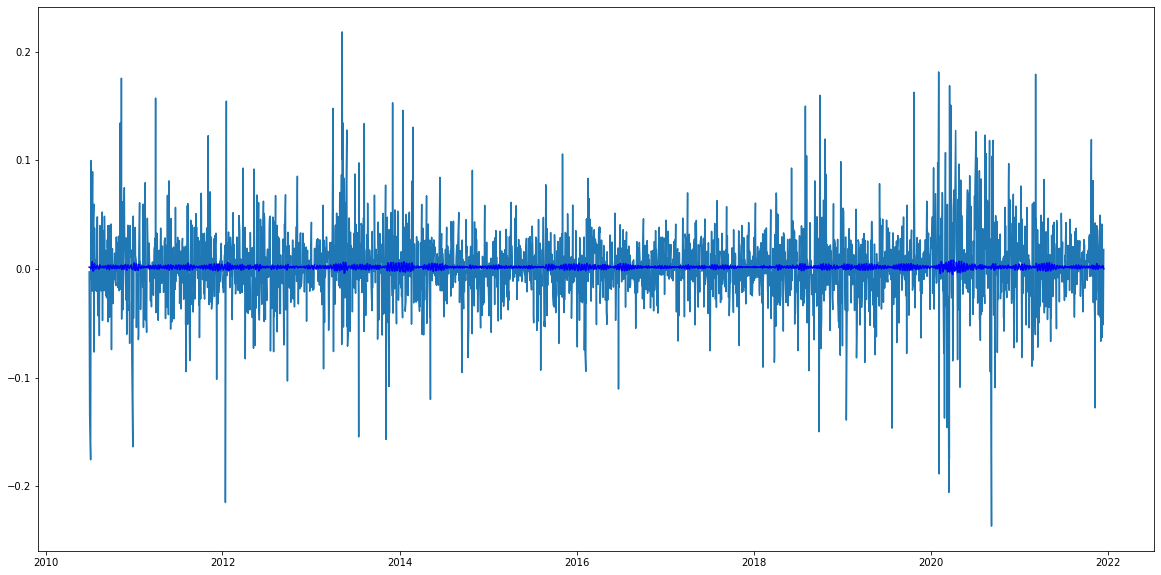

In [70]:
# ARIMA model
decomposition = seasonal_decompose(df_log, freq=52) 
model = ARIMA(df_log, order=(4,1,2))
results = model.fit(disp=0)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='blue')

In [71]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [72]:
df_log

,Close
Date,
2010-06-29,1.564022
2010-06-30,1.561507
2010-07-01,1.479785
2010-07-02,1.345472
2010-07-06,1.170002
...,...
2021-12-09,6.911548
2021-12-10,6.924642
2021-12-13,6.873588


In [73]:
predictions_ARIMA_log = pd.Series(df_log['Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

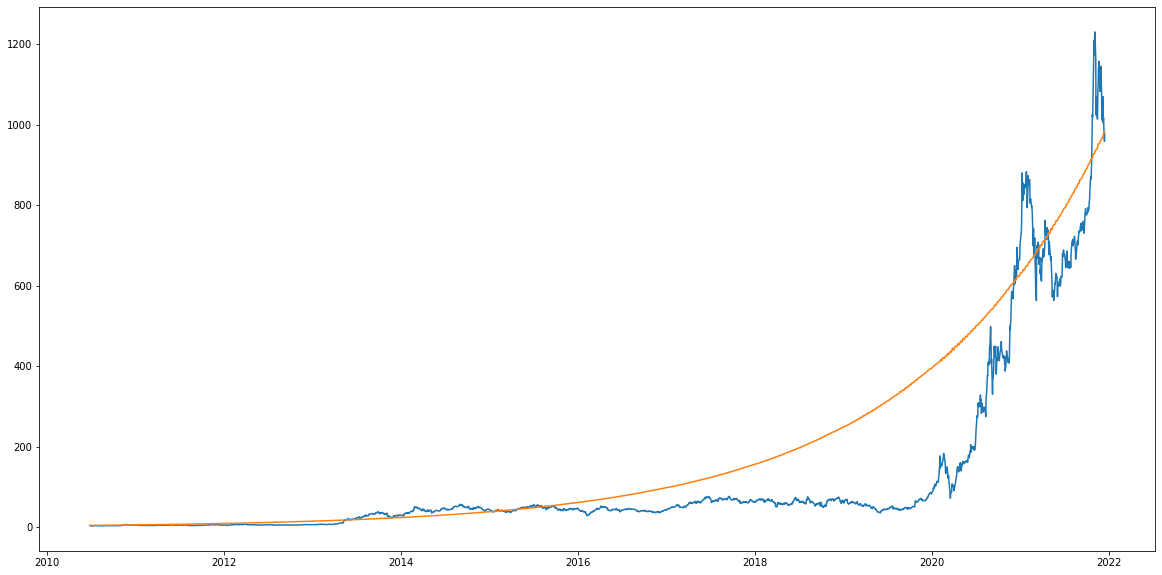

In [74]:
plt.plot(df2)
plt.plot(predictions_ARIMA)

In [75]:
df2.reset_index(inplace=True)
df2

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.84
4,2010-07-06,3.222
...,...,...
2883,2021-12-09,1003.8
2884,2021-12-10,1017.03
2885,2021-12-13,966.41
2886,2021-12-14,958.51


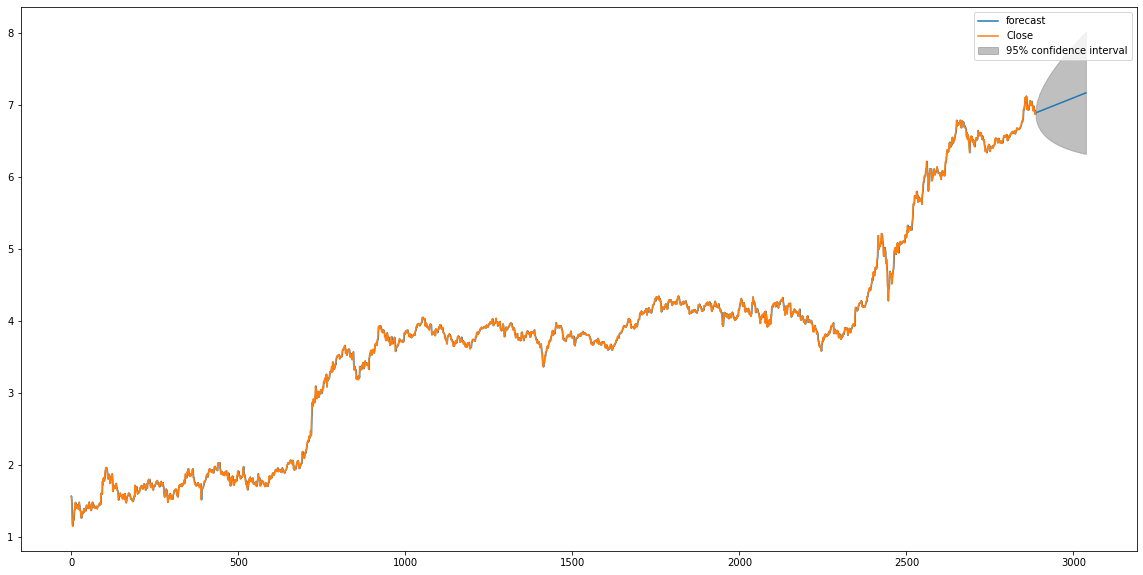

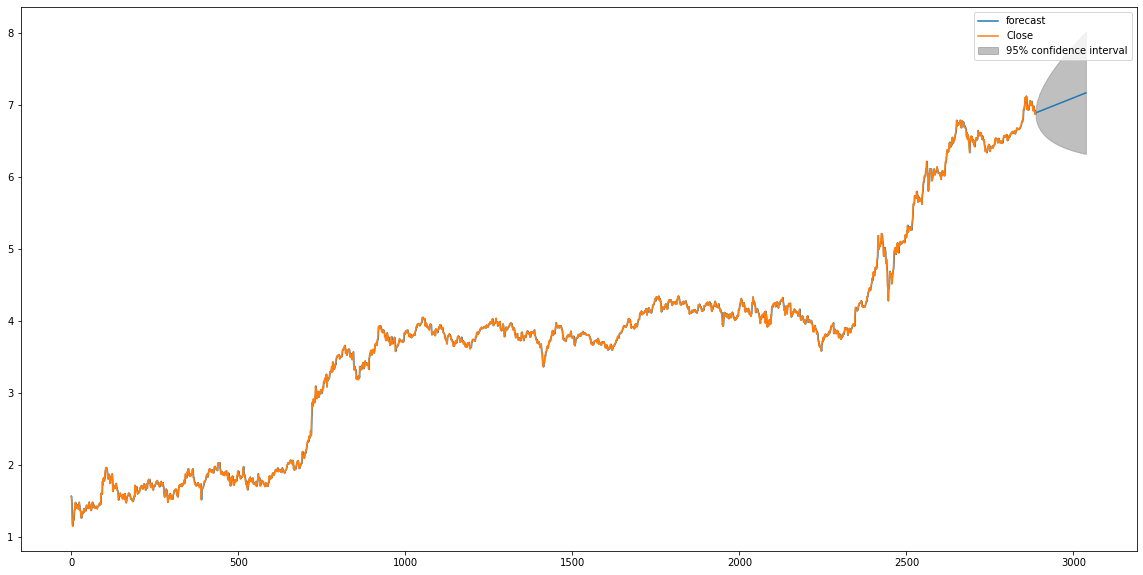

In [76]:
pd.plotting.register_matplotlib_converters()
results.plot_predict(1, len(df2)+150)

In [77]:
type(results)

pred_uc_ci = results.conf_int(alpha=0.05)
pred_uc_ci

,0,1
const,0.000563,0.003126
ar.L1.D.Close,1.175692,1.348860
ar.L2.D.Close,-1.052808,-0.843759
ar.L3.D.Close,-0.049866,0.069311
ar.L4.D.Close,-0.050414,0.026111
ma.L1.D.Close,-1.339229,-1.181911
ma.L2.D.Close,0.861599,1.034661


In [78]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2887
Model:                 ARIMA(4, 1, 2)   Log Likelihood                5567.325
Method:                       css-mle   S.D. of innovations              0.035
Date:                Mon, 17 Jan 2022   AIC                         -11118.651
Time:                        05:19:26   BIC                         -11070.907
Sample:                             1   HQIC                        -11101.444
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0018      0.001      2.821      0.005       0.001       0.003
ar.L1.D.Close     1.2623      0.044     28.574      0.000       1.176       1.349
ar.L2.D.Close    -0.9483      0.053    -

In [79]:
fc, se, conf = results.forecast(2888, alpha=0.05)  # 95% conf

In [90]:
prediction_days = input('Enter Prediction days: ')
print(f'You entered {prediction_days}')

Enter Prediction days: 15
You entered 15


In [93]:
prediction_days = int(prediction_days)
ne = np.exp(fc)
ne = ne[:prediction_days+1]

ne

array([ 976.64480061,  978.98435473,  982.8386394 ,  986.5287835 ,
        988.78967685,  989.39757555,  989.26243999,  989.74844697,
        991.72729358,  995.02164179,  998.57839681, 1001.22046714,
       1002.452091  , 1002.7630865 , 1003.24228415, 1004.8070021 ])

In [94]:
df2["Date"]=pd.to_datetime(df2.Date,format="%Y-%m-%d")
a = df2['Date'][len(df2)-1]
a = str(a)
date = a.split("-")

In [98]:
day_date = date[2].split(' ')
day_date[0]
day = int(day_date[0])
month = int(date[1])
year = int(date[0])

In [99]:
# fc_series = pd.Series(ne, index=df2.index)
# lower_series = pd.Series(conf[:, 0], index=df2.index)
# upper_series = pd.Series(conf[:, 1], index=df2.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(df2['Close'], label='Close')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

In [104]:
from datetime import datetime , timedelta

In [105]:
gDate = datetime(year, month, day) 
print("Given date is: ", gDate) 
tomorrow = gDate + timedelta(days = 1)


Given date is:  2021-12-15 00:00:00


In [122]:
df_5 = pd.DataFrame(index=range(0,prediction_days+1), columns=['Date'])
df_5

,Date
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [124]:
dt_obj=pd.to_datetime(tomorrow,format="%Y-%m-%d")
df_5['Date'][0] = dt_obj
df_5

,Date
0,2021-12-16 00:00:00
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [129]:
for i in range(1,prediction_days+1):
    df_5['Date'][i] = gDate + timedelta(days = i+1)

df_5


,Date
0,2021-12-16
1,2021-12-17
2,2021-12-18
3,2021-12-19
4,2021-12-20
5,2021-12-21
6,2021-12-22
7,2021-12-23
8,2021-12-24
9,2021-12-25


In [130]:
df_5['Date'] = pd.to_datetime(df_5.Date,format="%Y-%m-%d")

In [131]:
df_5

,Date
0,2021-12-16
1,2021-12-17
2,2021-12-18
3,2021-12-19
4,2021-12-20
5,2021-12-21
6,2021-12-22
7,2021-12-23
8,2021-12-24
9,2021-12-25


In [132]:
df_5['future_pred'] = ne

In [133]:
df_5

,Date,future_pred
0,2021-12-16,976.644801
1,2021-12-17,978.984355
2,2021-12-18,982.838639
3,2021-12-19,986.528784
4,2021-12-20,988.789677
5,2021-12-21,989.397576
6,2021-12-22,989.262440
7,2021-12-23,989.748447
8,2021-12-24,991.727294
9,2021-12-25,995.021642


In [135]:
df2 = df2.set_index('Date')
df_5 = df_5.set_index('Date')

In [137]:
df_6 = pd.concat([df2, df_5])

In [138]:
df_6

,Close,future_pred
Date,,
2010-06-29,4.778,NaN
2010-06-30,4.766,NaN
2010-07-01,4.392,NaN
2010-07-02,3.84,NaN
2010-07-06,3.222,NaN
...,...,...
2021-12-27,NaN,1001.220467
2021-12-28,NaN,1002.452091
2021-12-29,NaN,1002.763087


In [141]:
df3['Pred'].shape

(866,)

In [144]:

plotdf = pd.DataFrame({'date': df_6.index,
                       'original_close': df_6['Close'],
                       'lstm_test_pred' : df3['Pred'],
                       'train_predicted_close' : df2['Close'],
                       'future_predicted_close': df_6['future_pred']})

In [147]:
title_variable = " " + stock_name +" Stock Prediction"

fig = px.line(plotdf,x=plotdf['date'], y=plotdf['original_close'], title=title_variable)
fig.add_traces(
    list(px.line(plotdf,x='date', y='lstm_test_pred', color_discrete_sequence = ['red'] ).select_traces() )
)

fig.add_traces(
    list(px.line(plotdf,x='date', y='train_predicted_close' , color_discrete_sequence = ['green']).select_traces() )
)

fig.add_traces(
    list(px.line(plotdf,x='date', y='future_predicted_close' , color_discrete_sequence = ['blue']).select_traces() )
)


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Close",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()